#Fashion MNIST Dataset Image Classifier

#Libraries Imported

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
import numpy as np

#Reading Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
fashion_test = pd.read_csv('/content/gdrive/MyDrive/fashion_test.csv')
fashion_train = pd.read_csv('/content/gdrive/MyDrive/fashion_train.csv')
fashion_mnist =  pd.concat([fashion_train,fashion_test],axis=0,ignore_index=True)
fashion_mnist.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


#Data Preprocessing and splitting the data

In [ ]:
x= fashion_mnist.copy()
df= x.sample(frac=1)
y = df[['label']]
df_x= df.drop('label',axis = 1)

df_x.isnull().sum() 

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64

In [ ]:
y = df[['label']]


In [ ]:
from sklearn.model_selection import train_test_split
# x=x.values
# y=y.values
# (X_train_full, Y_train_full), (X_test, Y_tet)
x = df_x
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1)
# X_train_full, Y_train_full, X_test, Y_tet =x_train, y_train,x_test,  y_test
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
35679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50713,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61856,0,0,0,0,0,0,0,0,0,0,0,2,4,6,0,0,97,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,...,193,236,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,65,42,79,42,63,40,0,0,0,0,0,0,0,0,0,0
38281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5259,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36422,0,0,0,0,0,0,1,1,0,0,0,44,112,119,72,33,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,172,203,...,214,234,239,205,173,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,126,160,192,201,206,201,175,131,75,10,0,0,1,0,0,0,0,0
10478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
409,0,0,0,0,0,0,0,0,1,1,0,0,42,14,0,24,16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,30,...,243,238,254,173,0,8,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,101,112,130,148,155,153,147,134,118,129,45,0,4,0,0,0,0,0,0


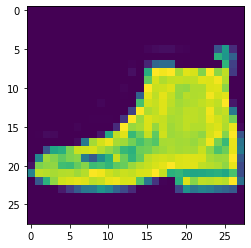

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

plt.imshow(X_train[0].reshape(28,28))


In [ ]:
Y_train.flatten()

array([9, 8, 5, ..., 7, 0, 9])

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
photo_label = np.array (class_names)[Y_train[5]]
photo_label[0]

'Sneaker'

##Data Normalization

In [ ]:
X_train_n = X_train/255
X_test_n = X_test/255

#Splitting the data into train, test, and validation

In [ ]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
Y_valid, Y_train = Y_train[:5000], Y_train[5000:]
X_test = X_test_n

#Model Building

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(450, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) #We used softmax because it is k-class classification and 10 neurones because we have 10 classes

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 450)               353250    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               45100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 399,360
Trainable params: 399,360
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights, biases = model.layers[1].get_weights()
weights, biases

(array([[-0.01810243, -0.01318945, -0.03386219, ..., -0.0046935 ,
          0.06108893,  0.02512782],
        [-0.01907953, -0.00880566,  0.00977492, ..., -0.02792796,
         -0.02621931,  0.01708918],
        [ 0.0044546 , -0.06537578, -0.03308037, ..., -0.04280693,
         -0.05095574, -0.03046555],
        ...,
        [ 0.02908206, -0.06604415,  0.00728897, ..., -0.03764518,
          0.00071645, -0.04397392],
        [ 0.04460958,  0.02370541, -0.0288597 , ...,  0.06062905,
         -0.0060636 , -0.00315237],
        [-0.05344025,  0.00396676,  0.04784107, ..., -0.04784018,
          0.06403568,  0.03578499]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights.shape, biases.shape

((784, 450), (450,))

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics = ["accuracy"]    
)

In [ ]:
model_history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_valid, Y_valid))

Epoch 1/30
1813/1813 [==============================] - 10s 5ms/step - loss: 0.6917 - accuracy: 0.7711 - val_loss: 0.5663 - val_accuracy: 0.8074
Epoch 2/30
1813/1813 [==============================] - 9s 5ms/step - loss: 0.4790 - accuracy: 0.8333 - val_loss: 0.4689 - val_accuracy: 0.8342
Epoch 3/30
1813/1813 [==============================] - 9s 5ms/step - loss: 0.4356 - accuracy: 0.8469 - val_loss: 0.4403 - val_accuracy: 0.8448
Epoch 4/30
1813/1813 [==============================] - 9s 5ms/step - loss: 0.4096 - accuracy: 0.8569 - val_loss: 0.4297 - val_accuracy: 0.8472
Epoch 5/30
1813/1813 [==============================] - 9s 5ms/step - loss: 0.3900 - accuracy: 0.8627 - val_loss: 0.4154 - val_accuracy: 0.8580
Epoch 6/30
1813/1813 [==============================] - 8s 5ms/step - loss: 0.3732 - accuracy: 0.8682 - val_loss: 0.4242 - val_accuracy: 0.8516
Epoch 7/30
1813/1813 [==============================] - 9s 5ms/step - loss: 0.3591 - accuracy: 0.8732 - val_loss: 0.4230 - val_accuracy

#Model evaluation

In [ ]:
model_history.params

{'epochs': 30, 'steps': 1813, 'verbose': 1}

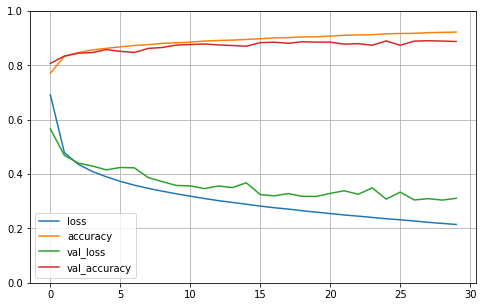

In [ ]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

219/219 [==============================] - 1s 3ms/step - loss: 0.3110 - accuracy: 0.8921


[0.3109889328479767, 0.8921428322792053]